In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_path = "WHO-COVID-19-global-data.csv"
df = pd.read_csv(file_path, sep='\t')
df.head()
print(df.columns)

Index(['Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths'], dtype='object')


In [4]:
# Data Cleaning
df[['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']] = df['Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths'].str.split(';', expand=True)
df = df.drop(columns=['Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths'])
print("Updated DataFrame:")
print(df.head())

Updated DataFrame:
  Date_reported Country_code      Country WHO_region New_cases  \
0    05/01/2020           AF  Afghanistan       EMRO             
1    12/01/2020           AF  Afghanistan       EMRO             
2    19/01/2020           AF  Afghanistan       EMRO             
3    26/01/2020           AF  Afghanistan       EMRO             
4    02/02/2020           AF  Afghanistan       EMRO             

  Cumulative_cases New_deaths Cumulative_deaths  
0                0                            0  
1                0                            0  
2                0                            0  
3                0                            0  
4                0                            0  


In [5]:
df.to_csv('path_to_cleaned_dataset.csv', index=False)

ValueError: could not convert string to float: '05/01/2020'

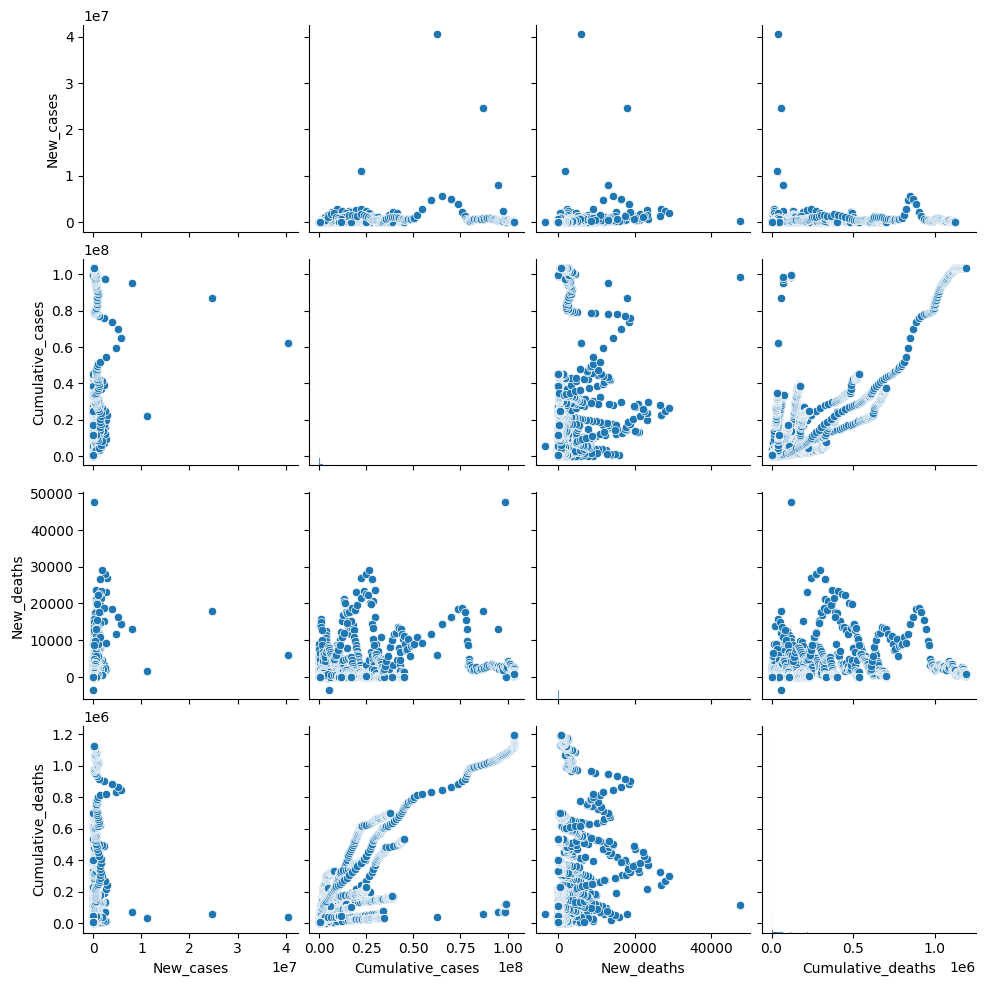

In [6]:
# Convert 'New_cases', 'Cumulative_cases', 'New_deaths', and 'Cumulative_deaths' columns to numeric type
df['New_cases'] = pd.to_numeric(df['New_cases'])
df['Cumulative_cases'] = pd.to_numeric(df['Cumulative_cases'])
df['New_deaths'] = pd.to_numeric(df['New_deaths'])
df['Cumulative_deaths'] = pd.to_numeric(df['Cumulative_deaths'])
sns.pairplot(df)
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
df.hist(figsize=(10, 10))
plt.show()

AttributeError: 'numpy.datetime64' object has no attribute 'strftime'

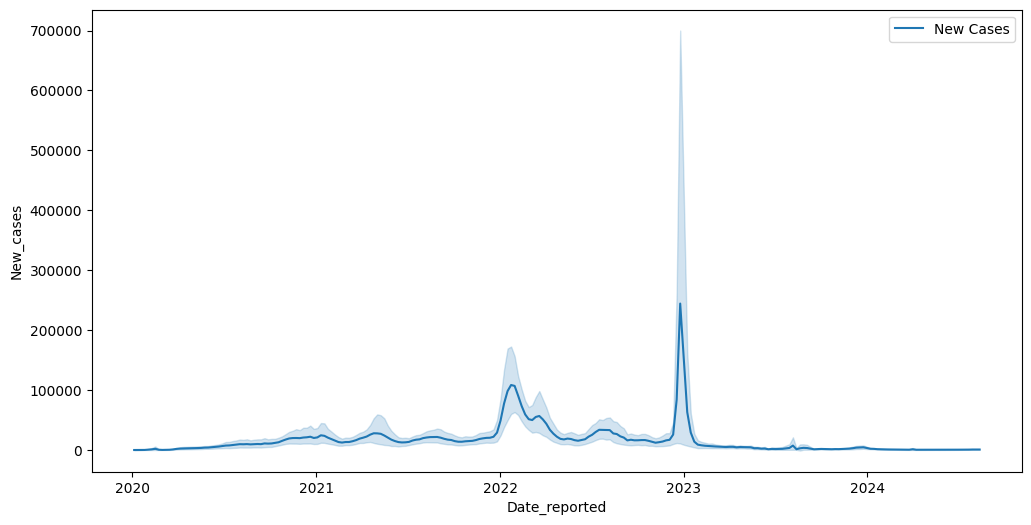

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Date_reported'] = pd.to_datetime(df['Date_reported'], format='%d/%m/%Y')
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
# New cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_reported', y='New_cases', data=df, label='New Cases')
max_new_cases = df['New_cases'].max()
min_new_cases = df['New_cases'].min()
max_date = df[df['New_cases'] == max_new_cases]['Date_reported'].values[0]
min_date = df[df['New_cases'] == min_new_cases]['Date_reported'].values[0]

plt.scatter(max_date, max_new_cases, color='red', label=f'Highest: {max_new_cases} on {max_date.strftime("%Y-%m-%d")}')
plt.scatter(min_date, min_new_cases, color='blue', label=f'Lowest: {min_new_cases} on {min_date.strftime("%Y-%m-%d")}')

plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



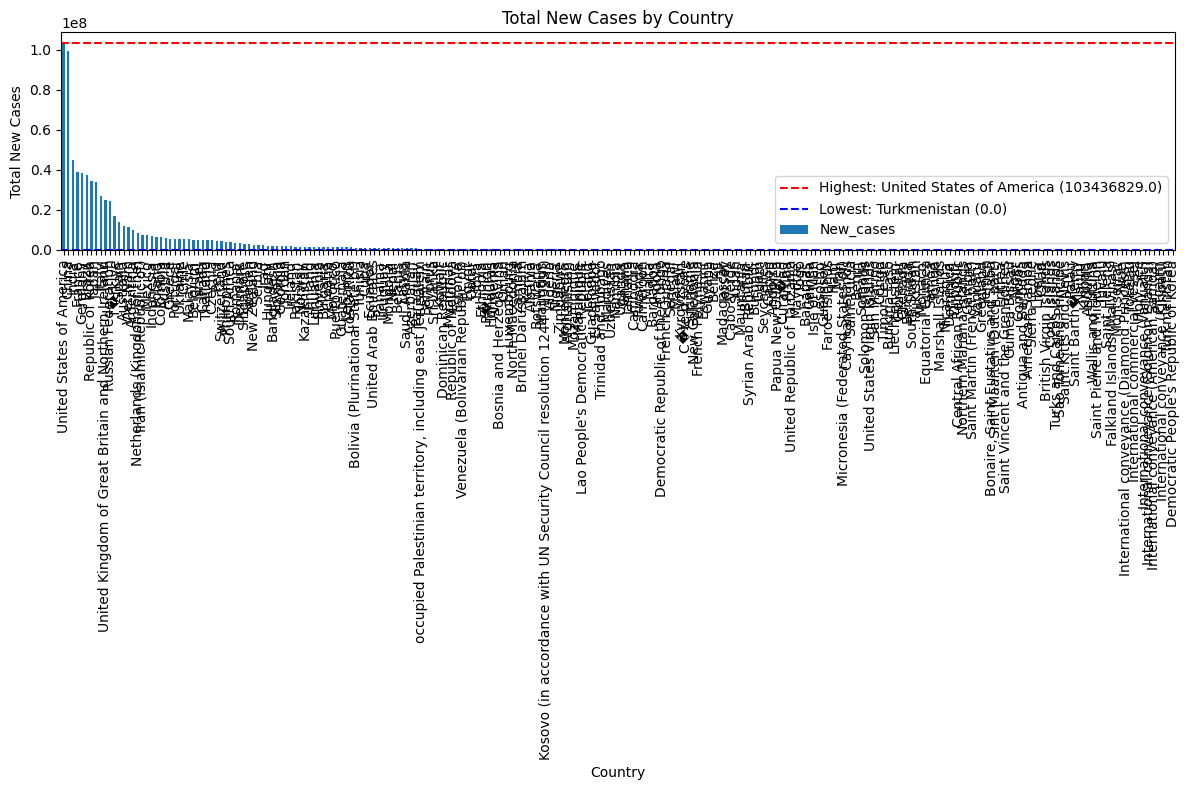

In [ ]:
# Aggregate new cases by country
country_cases = df.groupby('Country')['New_cases'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
ax = country_cases.plot(kind='bar')
highest_country = country_cases.idxmax()
highest_cases = country_cases.max()
lowest_country = country_cases.idxmin()
lowest_cases = country_cases.min()

plt.axhline(highest_cases, color='red', linestyle='--', label=f'Highest: {highest_country} ({highest_cases})')
plt.axhline(lowest_cases, color='blue', linestyle='--', label=f'Lowest: {lowest_country} ({lowest_cases})')

plt.title('Total New Cases by Country')
plt.xlabel('Country')
plt.ylabel('Total New Cases')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


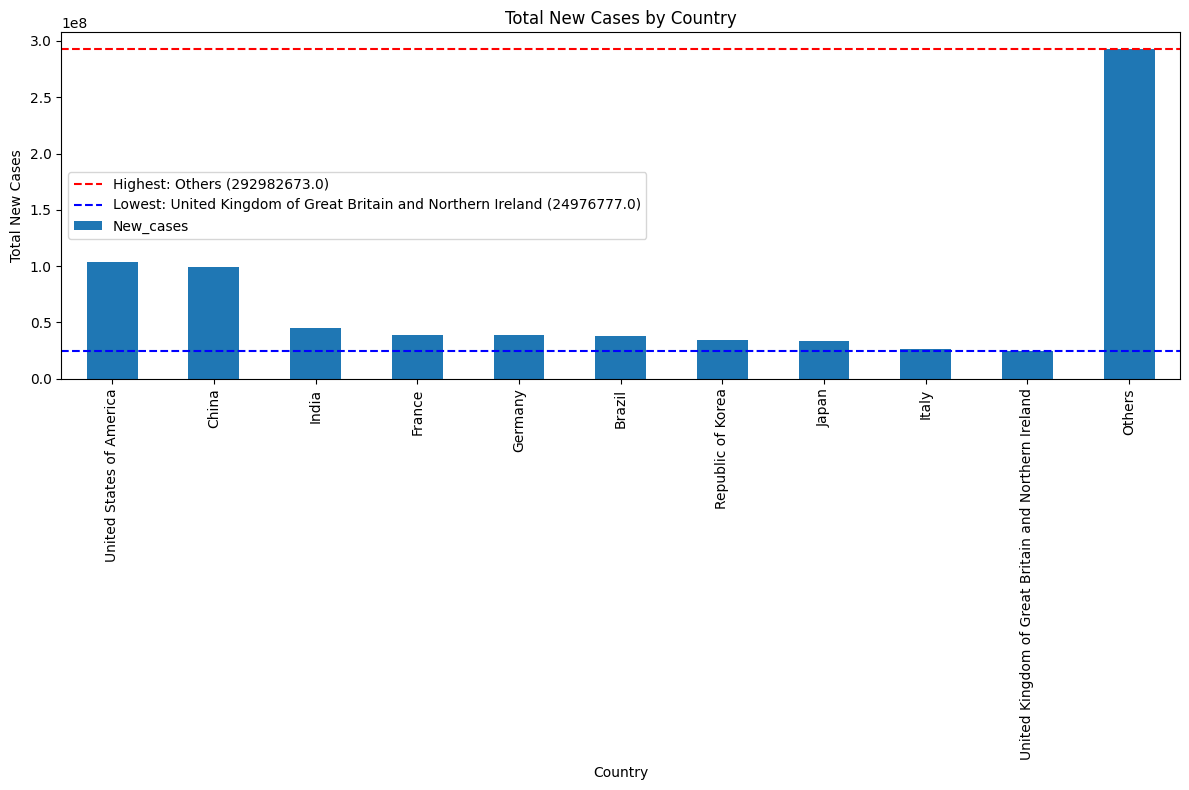

In [22]:
# Aggregate new cases by country
country_cases = df.groupby('Country')['New_cases'].sum().sort_values(ascending=False)
top_countries = country_cases.nlargest(10)
others = country_cases.iloc[10:].sum()
top_countries['Others'] = others

plt.figure(figsize=(12, 8))
ax = top_countries.plot(kind='bar')

highest_country = top_countries.idxmax()
highest_cases = top_countries.max()
lowest_country = top_countries.idxmin()
lowest_cases = top_countries.min()

plt.axhline(highest_cases, color='red', linestyle='--', label=f'Highest: {highest_country} ({highest_cases})')
plt.axhline(lowest_cases, color='blue', linestyle='--', label=f'Lowest: {lowest_country} ({lowest_cases})')

plt.title('Total New Cases by Country')
plt.xlabel('Country')
plt.ylabel('Total New Cases')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


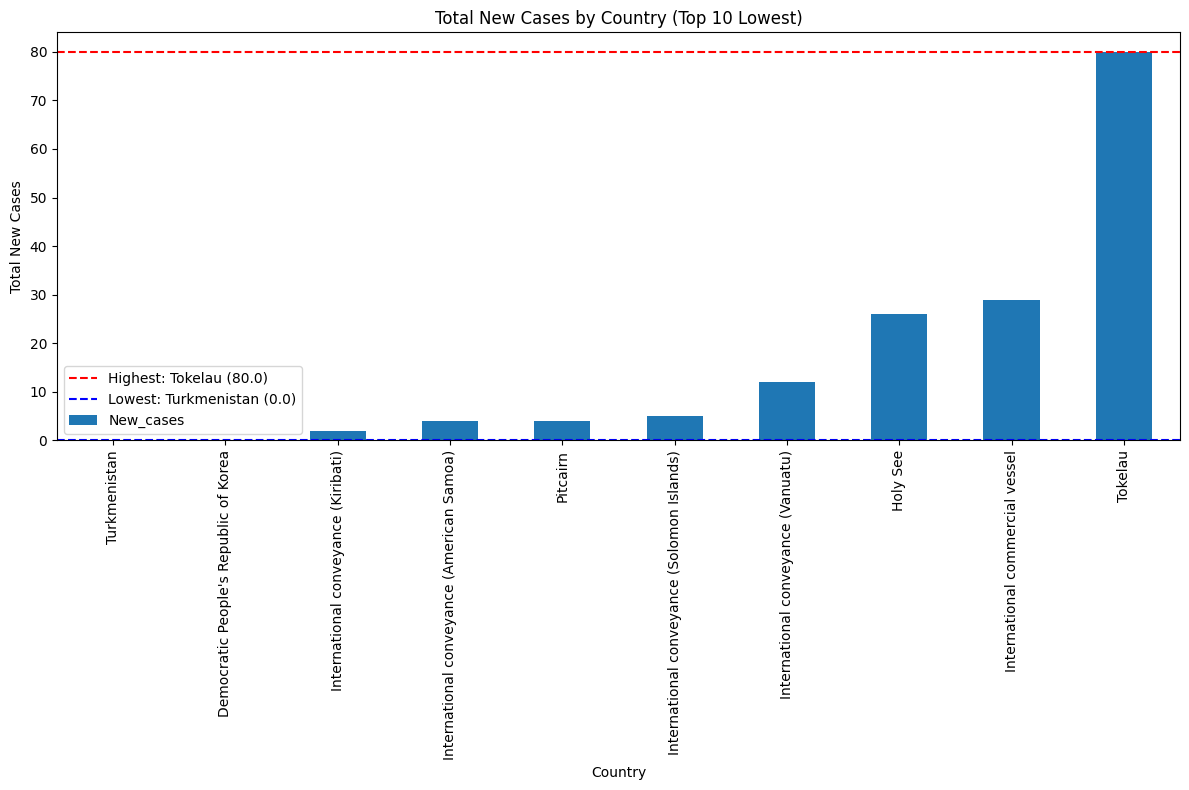

In [25]:
lowest_countries = country_cases.nsmallest(10)
others = country_cases.iloc[:-10].sum()

plt.figure(figsize=(12, 8))
ax = lowest_countries.plot(kind='bar')

highest_country = lowest_countries.idxmax()
highest_cases = lowest_countries.max()
lowest_country = lowest_countries.idxmin()
lowest_cases = lowest_countries.min()

plt.axhline(highest_cases, color='red', linestyle='--', label=f'Highest: {highest_country} ({highest_cases})')
plt.axhline(lowest_cases, color='blue', linestyle='--', label=f'Lowest: {lowest_country} ({lowest_cases})')

plt.title('Total New Cases by Country (Top 10 Lowest)')
plt.xlabel('Country')
plt.ylabel('Total New Cases')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


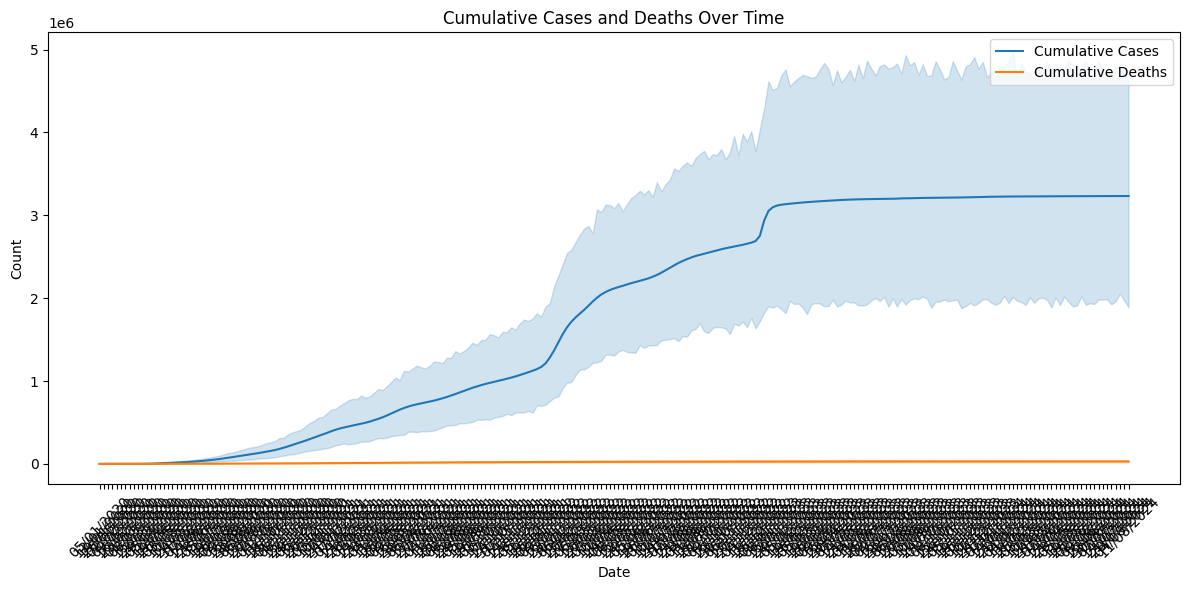

In [ ]:
# Plot cumulative cases and deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_reported', y='Cumulative_cases', data=df, label='Cumulative Cases')
sns.lineplot(x='Date_reported', y='Cumulative_deaths', data=df, label='Cumulative Deaths')
plt.title('Cumulative Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


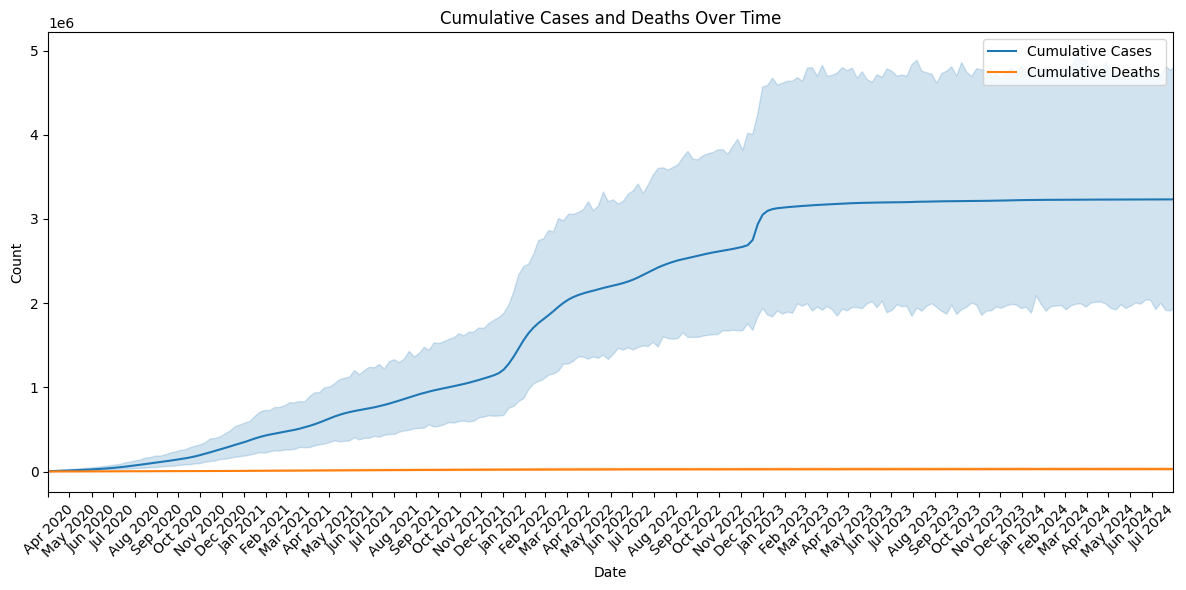

In [7]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
df['Date_reported'] = pd.to_datetime(df['Date_reported'], format='%d/%m/%Y')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_reported', y='Cumulative_cases', data=df, label='Cumulative Cases')
sns.lineplot(x='Date_reported', y='Cumulative_deaths', data=df, label='Cumulative Deaths')

plt.title('Cumulative Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.xlim([pd.to_datetime('2020-04-01'), pd.to_datetime('2024-07-31')])
plt.legend()
plt.tight_layout()
plt.show()


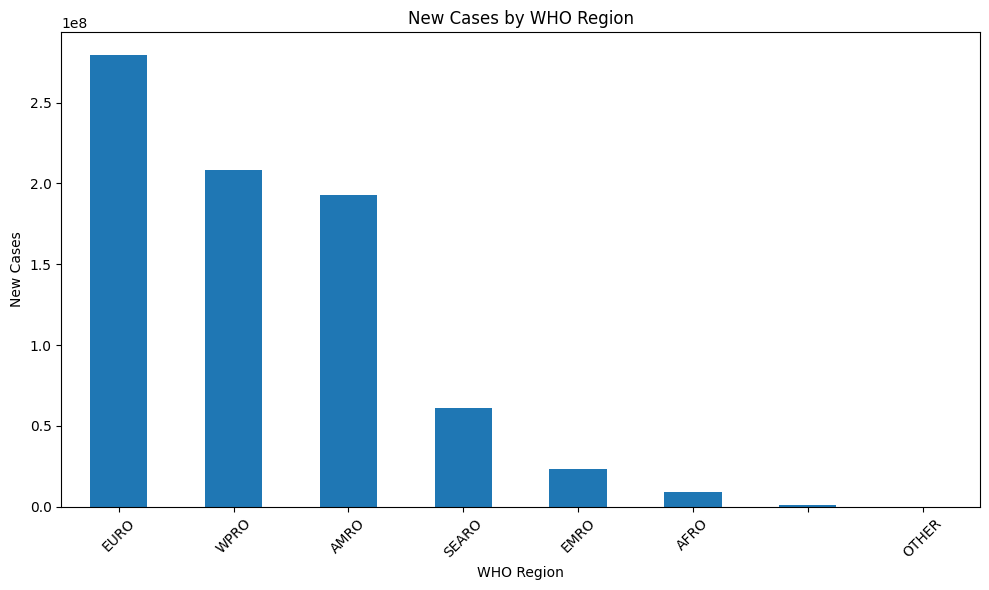

In [ ]:
# Aggregate new cases by WHO region
region_cases = df.groupby('WHO_region')['New_cases'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_cases.plot(kind='bar')
plt.title('New Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


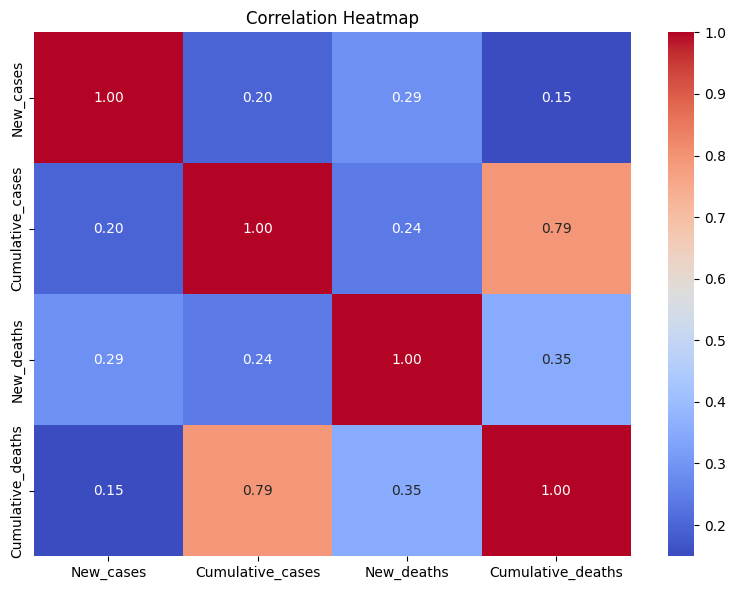

In [ ]:
# correlation heatmap
corr = df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
# Summary statistics for numerical columns
stats = df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].describe()
print("Summary Statistics:")
print(stats)


Summary Statistics:
          New_cases  Cumulative_cases    New_deaths  Cumulative_deaths
count  3.902800e+04      5.784000e+04  25001.000000       5.784000e+04
mean   1.988104e+04      1.792594e+06    282.323947       2.001023e+04
std    2.707823e+05      7.797691e+06   1214.392195       8.186440e+04
min   -6.507900e+04      0.000000e+00  -3432.000000       0.000000e+00
25%    4.300000e+01      4.162750e+03      4.000000       2.800000e+01
50%    3.930000e+02      4.588300e+04     20.000000       5.650000e+02
75%    3.968000e+03      5.220872e+05    105.000000       6.974500e+03
max    4.047548e+07      1.034368e+08  47687.000000       1.194158e+06


In [ ]:
# Highest and lowest values
highest_values = df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].max()
lowest_values = df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].min()
print("Highest Values:")
print(highest_values)
print("Lowest Values:")
print(lowest_values)


Highest Values:
New_cases             40475477.0
Cumulative_cases     103436829.0
New_deaths               47687.0
Cumulative_deaths      1194158.0
dtype: float64
Lowest Values:
New_cases           -65079.0
Cumulative_cases         0.0
New_deaths           -3432.0
Cumulative_deaths        0.0
dtype: float64
